# Boosting

1. Adaboost
2. Gradient Boosting
3. XGBoost
4. LightGBM
5. CatBoost
6. HistGradientBoosting

In [ ]:
!pip install wooldridge catboost lightgbm shap xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wooldridge as wd

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 5.3 MB/s 
     |████████████████████████████████| 76.8 MB 1.2 MB/s 
     |████████████████████████████████| 569 kB 42.8 MB/s 


1. Importación de datos
2. Selección de variables
3. Creación de función para comparar metricas
4. Explicación breve de cada algoritmo
5. Implementación de algoritmos por separado
6. Implementación grupal de los algoritmos
7. Creación de función con grid search que entregará el mejor algoritmo de boosting

In [ ]:
data = wd.data('mroz')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   inlf      753 non-null    int64  
 1   hours     753 non-null    int64  
 2   kidslt6   753 non-null    int64  
 3   kidsge6   753 non-null    int64  
 4   age       753 non-null    int64  
 5   educ      753 non-null    int64  
 6   wage      428 non-null    float64
 7   repwage   753 non-null    float64
 8   hushrs    753 non-null    int64  
 9   husage    753 non-null    int64  
 10  huseduc   753 non-null    int64  
 11  huswage   753 non-null    float64
 12  faminc    753 non-null    float64
 13  mtr       753 non-null    float64
 14  motheduc  753 non-null    int64  
 15  fatheduc  753 non-null    int64  
 16  unem      753 non-null    float64
 17  city      753 non-null    int64  
 18  exper     753 non-null    int64  
 19  nwifeinc  753 non-null    float64
 20  lwage     428 non-null    float6

In [ ]:
data = data.filter(['inlf','kdslt6','kidsge6','age','educ','husage','huseduc','huswage','exper','expersq'])

In [ ]:
data.head()

,inlf,kidsge6,age,educ,husage,huseduc,huswage,exper,expersq
0,1,0,32,12,34,12,4.0288,14,196
1,1,2,30,12,30,9,8.4416,5,25
2,1,3,35,12,40,12,3.5807,15,225
3,1,3,34,12,53,10,3.5417,6,36
4,1,2,31,14,32,12,10.0000,7,49


In [ ]:
data['inlf'].value_counts(normalize=True)

1    0.568393
0    0.431607
Name: inlf, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='inlf'), data['inlf'], test_size=0.2, random_state=12345)

## Algoritmos de boosting




### AdaBoost

Penalización de las predicciones erradas en cada stack.
#### Hiperparámetros

1. `base_estimator`
2. `n_estimators`
3 `learning_rate`
4. `estimators`

### GradientBoosting

No penaliza las malas predicciones sino que utiliza busca minimizar una función de perdida a través del descenso del gradiente.

#### Hiperparámetros

1. `n_estimators`
2. `max_depth`
3. `learning_rate`

Hiperparámetros comunes de los árboles.

### XGBoost

Mejora el algoritmo de GradientBoosting empleando regularización y ejecución en paralelo. 

#### Hiperparámetros

1. `n_estimators`
2. `max_depth`
3. `eta`: learning_rate
4. `reg_alpha`: l1_regularization
5. `reg_lambda`: l2_regularization
6. `gamma`: control de complejidad. Especifica el nivel de reducción de perdida mínima requerida para hacer un split.

### HistGradientBoosting

#### Hiperparámetros

Igual a GradientBossting pero más rápido

### LightGBM

Mejora la ejecución del algoritmo. Emplea gradient boosting con histogramas.

#### Hiperparámetros

1. Control del árbol:
  - `num_leaves`
  - `max_depth`
  - `min_data_in_leaf`

2. Mejor precisión:
  - `n_estimators`
  - `learning_rate`

3. Controlar overfitting:
  - `lambda_l1`
  - `lambda_l2`
  - `min_gain_to_split`


### CatBoost

Soporta variables categóricas.



In [ ]:
def boosting_implement(X_train, y_train, X_test, y_test):
  dic_metrics = {'f1': [], 
                 'auc': [],
                 'model':[]}
  for modelo in [GradientBoostingClassifier(), AdaBoostClassifier(), HistGradientBoostingClassifier(), XGBClassifier(),CatBoostClassifier(silent=True), LGBMClassifier()]:
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    dic_metrics['f1'].append(f1_score(y_test, y_pred))
    dic_metrics['auc'].append(roc_auc_score(y_test, y_pred))
    dic_metrics['model'].append(modelo)
  
  met_df = pd.DataFrame(dic_metrics).T
  met_df.columns = ["GradientBoostingClassifier", "AdaBoostClassifier", "HistGradientBoostingClassifier", "XGBClassifier", "CatBoostClassifier", "LGBMClassifier"]
  return dic_metrics

In [ ]:
dic_models = boosting_implement(X_train, y_train, X_test, y_test)

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(dic_models['model'][4].predict, X_test)
shap_values = explainer(X_test)

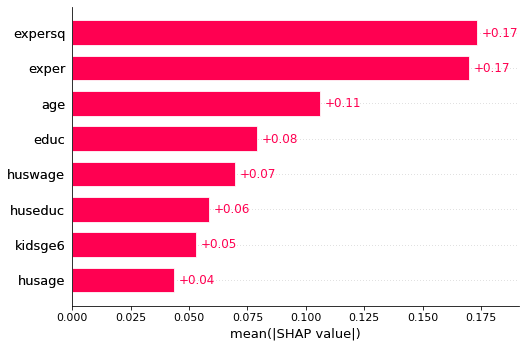

In [ ]:
shap.plots.bar(shap_values)

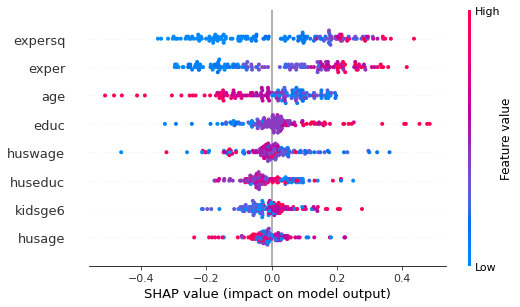

In [ ]:
shap.plots.beeswarm(shap_values)